# Franchise Launching Strategy: 'Starbucks' and 'Ediya Coffee'

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
%matplotlib inline

df_seoul = pd.read_csv("seoul_open_stores.csv")
df_seoul.head()

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude
0,와라와라호프,Restaurant,Bar/Liquor Store,호프/맥주,Seoul,Gangnam-gu,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Gangnam-gu,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,Restaurant,Bar/Liquor Store,호프/맥주,Seoul,Geumcheon-gu,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,Service,대중목욕탕/휴게,사우나/증기탕/온천,Seoul,Songpa-gu,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,Restaurant,Japanese/Seafood,음식점-초밥전문,Seoul,Songpa-gu,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [2]:
df_seoul["Store Name"] = df_seoul["Store Name"].str.lower()
df_cafe = df_seoul[df_seoul["Store Name"].str.contains("이디야|이디아|ediya|스타벅스|starbucks")].copy()
df_cafe.shape

(1049, 9)

In [3]:
df_cafe.loc[df_cafe["Store Name"].str.contains('스타벅스|starbucks'), "Brand"] = "Starbucks"
df_cafe.loc[df_cafe["Store Name"].str.contains('이디야|이디아|ediya'), "Brand"] = "Ediya Coffee"
df_cafe.head()

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude,Brand
778,스타벅스,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Yongsan-gu,서울특별시 용산구 이태원로 188,126.994781,37.534303,Starbucks
1196,이디야커피,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Yeongdeungpo-gu,서울특별시 영등포구 영등포로 353,126.918062,37.515118,Ediya Coffee
1500,스타벅스종로3가점,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Jongno-gu,서울특별시 종로구 종로 113-1,126.990207,37.570585,Starbucks
1994,스타벅스,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Seocho-gu,서울특별시 서초구 강남대로 581,127.019763,37.513663,Starbucks
2124,이디야커피,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Guro-gu,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,Ediya Coffee


In [4]:
df_cafe = df_cafe[df_cafe["Subtype"] == "Caffe/Tea"].copy()
df_cafe.shape

(1036, 10)

In [5]:
df_cafe["Brand"].value_counts()

Ediya Coffee    532
Starbucks       504
Name: Brand, dtype: int64

## 1. Visualization

<AxesSubplot:xlabel='Brand', ylabel='count'>

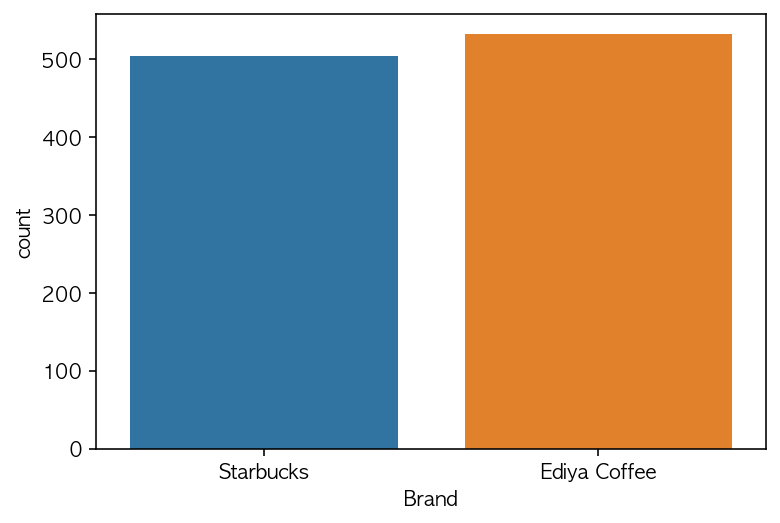

In [6]:
sb.countplot(data=df_cafe,x="Brand")

<AxesSubplot:xlabel='count', ylabel='District'>

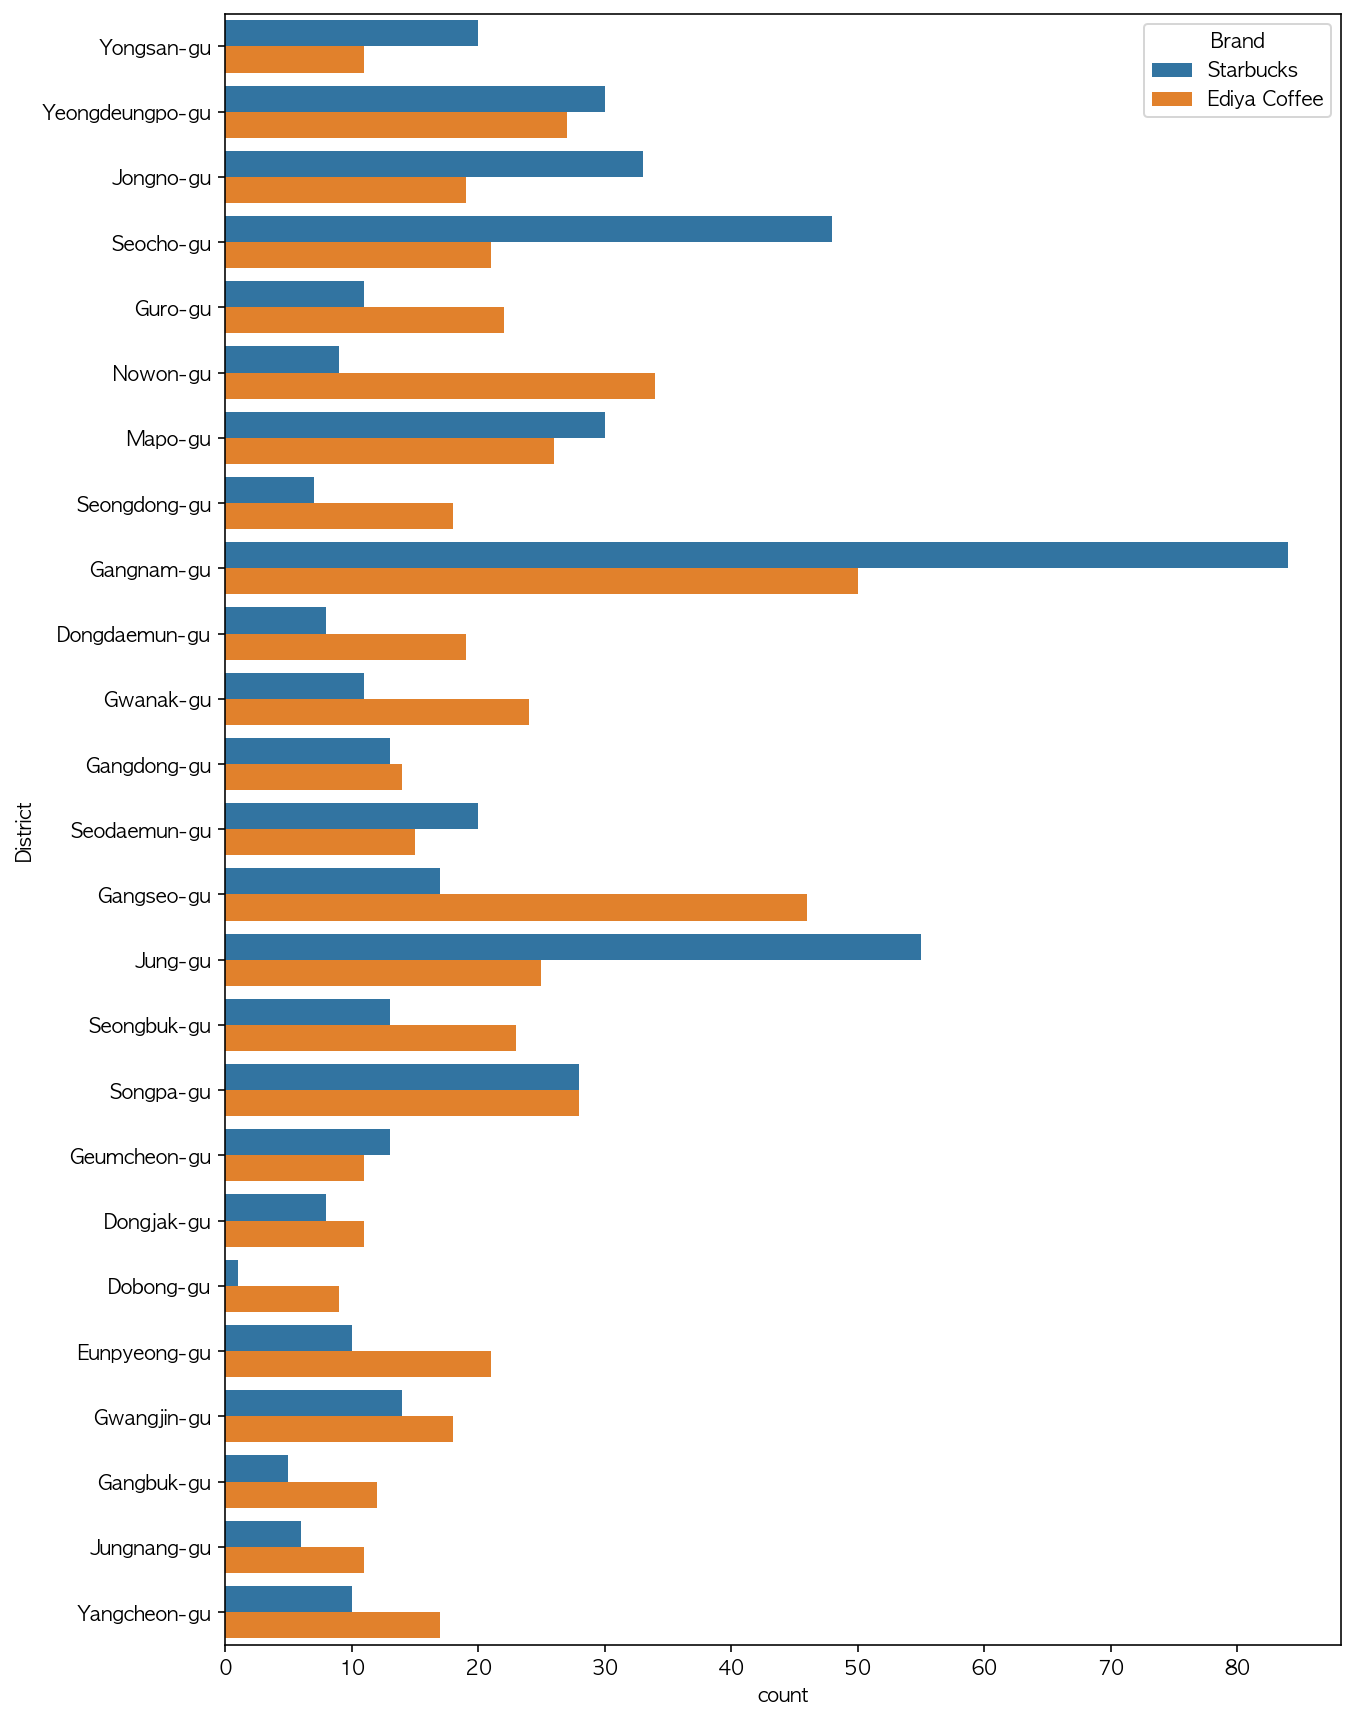

In [7]:
plt.figure(figsize=(10,15))
sb.countplot(data=df_cafe, y="District", hue="Brand")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

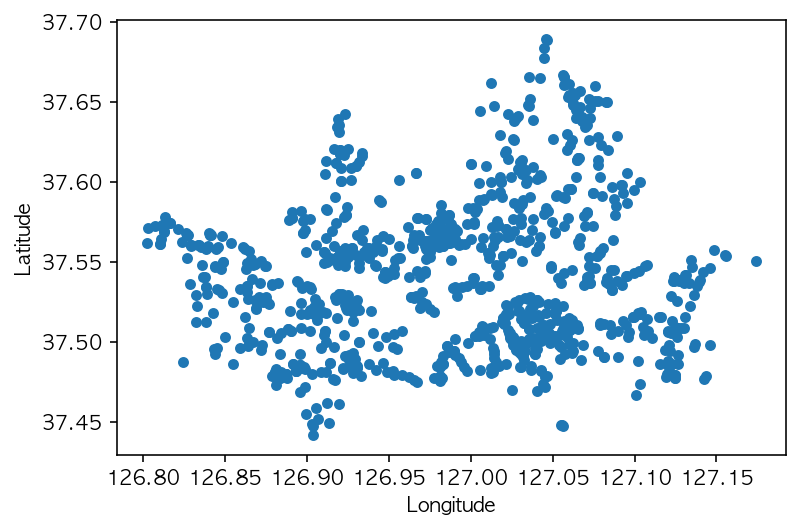

In [8]:
# scatter plot by pandas
df_cafe[["Latitude","Longitude"]].plot.scatter(x="Longitude",y="Latitude")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

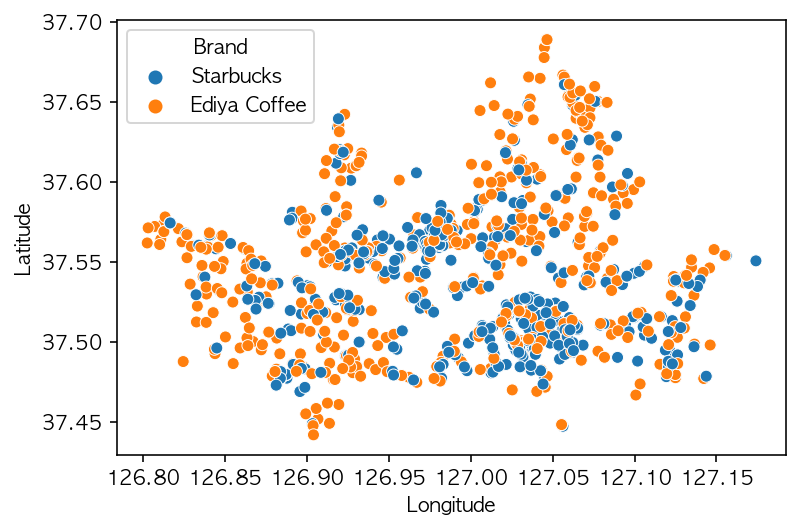

In [9]:
# scatter plot by seaborn
sb.scatterplot(data=df_cafe, x="Longitude", y="Latitude", hue="Brand")

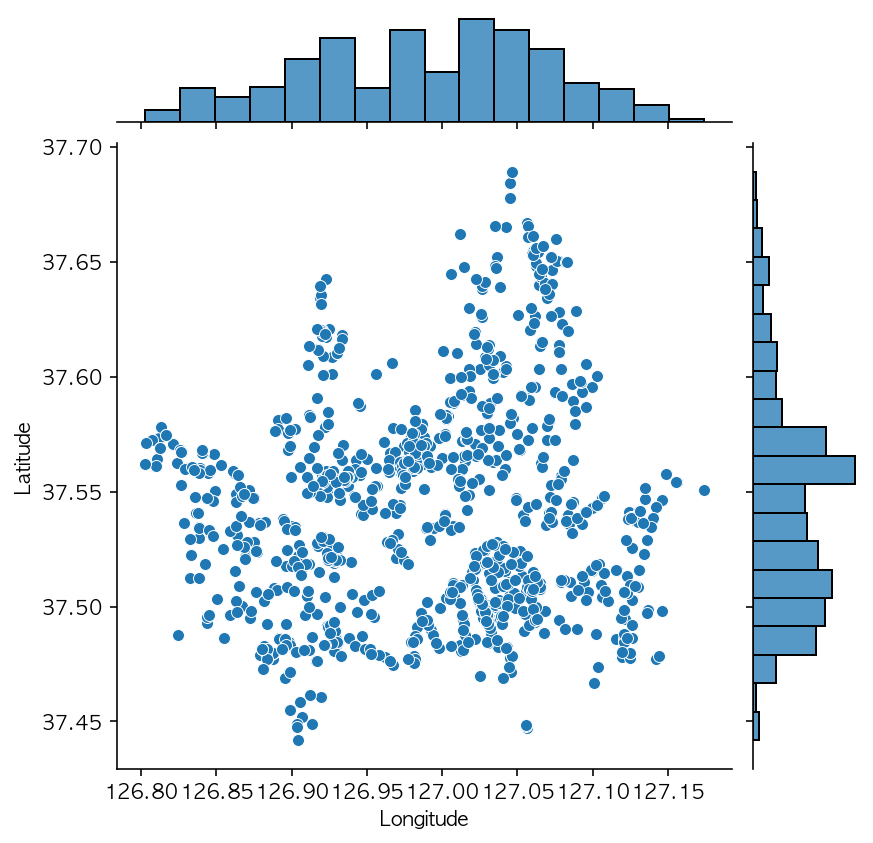

In [10]:
# joint plot
sb.jointplot(data=df_cafe, x="Longitude", y="Latitude")

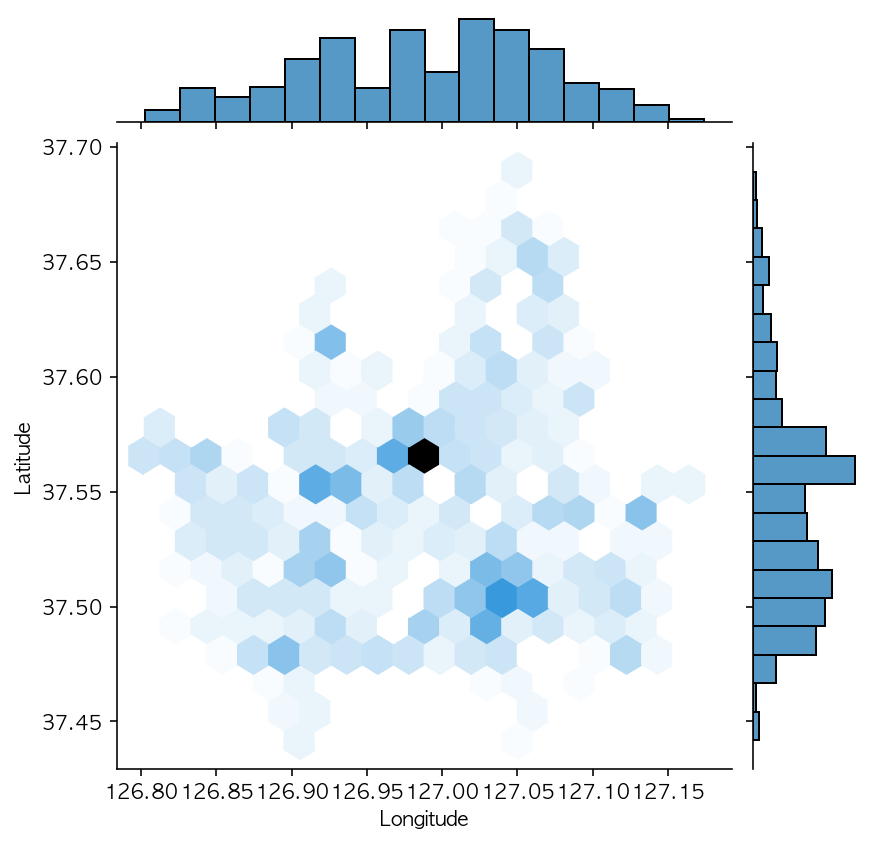

In [11]:
# kde plot
sb.jointplot(data=df_cafe, x="Longitude", y="Latitude", kind="hex")

### 'groupby' vs. 'pivot_table'

In [12]:
# 'groupby' returns as series
df_cafe_count = df_cafe.groupby(["District", "Brand"])["Store Name"].count()
df_cafe_count.head()

District       Brand       
Dobong-gu      Ediya Coffee     9
               Starbucks        1
Dongdaemun-gu  Ediya Coffee    19
               Starbucks        8
Dongjak-gu     Ediya Coffee    11
Name: Store Name, dtype: int64

In [13]:
df_cafe_count = df_cafe_count.to_frame()
df_cafe_count = df_cafe_count.reset_index()
df_cafe_count.columns = ["District", "Brand", "Number"]
df_cafe_count.head()

,District,Brand,Number
0,Dobong-gu,Ediya Coffee,9
1,Dobong-gu,Starbucks,1
2,Dongdaemun-gu,Ediya Coffee,19
3,Dongdaemun-gu,Starbucks,8
4,Dongjak-gu,Ediya Coffee,11


In [14]:
# pivot table returns as data frame
df_pivot = pd.pivot_table(data=df_cafe, index=["District", "Brand"], values="Store Name", aggfunc="count")
df_pivot.head()

Store Name
District      Brand                   
Dobong-gu     Ediya Coffee           9
              Starbucks              1
Dongdaemun-gu Ediya Coffee          19
              Starbucks              8
Dongjak-gu    Ediya Coffee          11

In [15]:
df_pivot.loc["Gangnam-gu"]

,Store Name
Brand,
Ediya Coffee,50
Starbucks,84


<AxesSubplot:xlabel='Number', ylabel='District'>

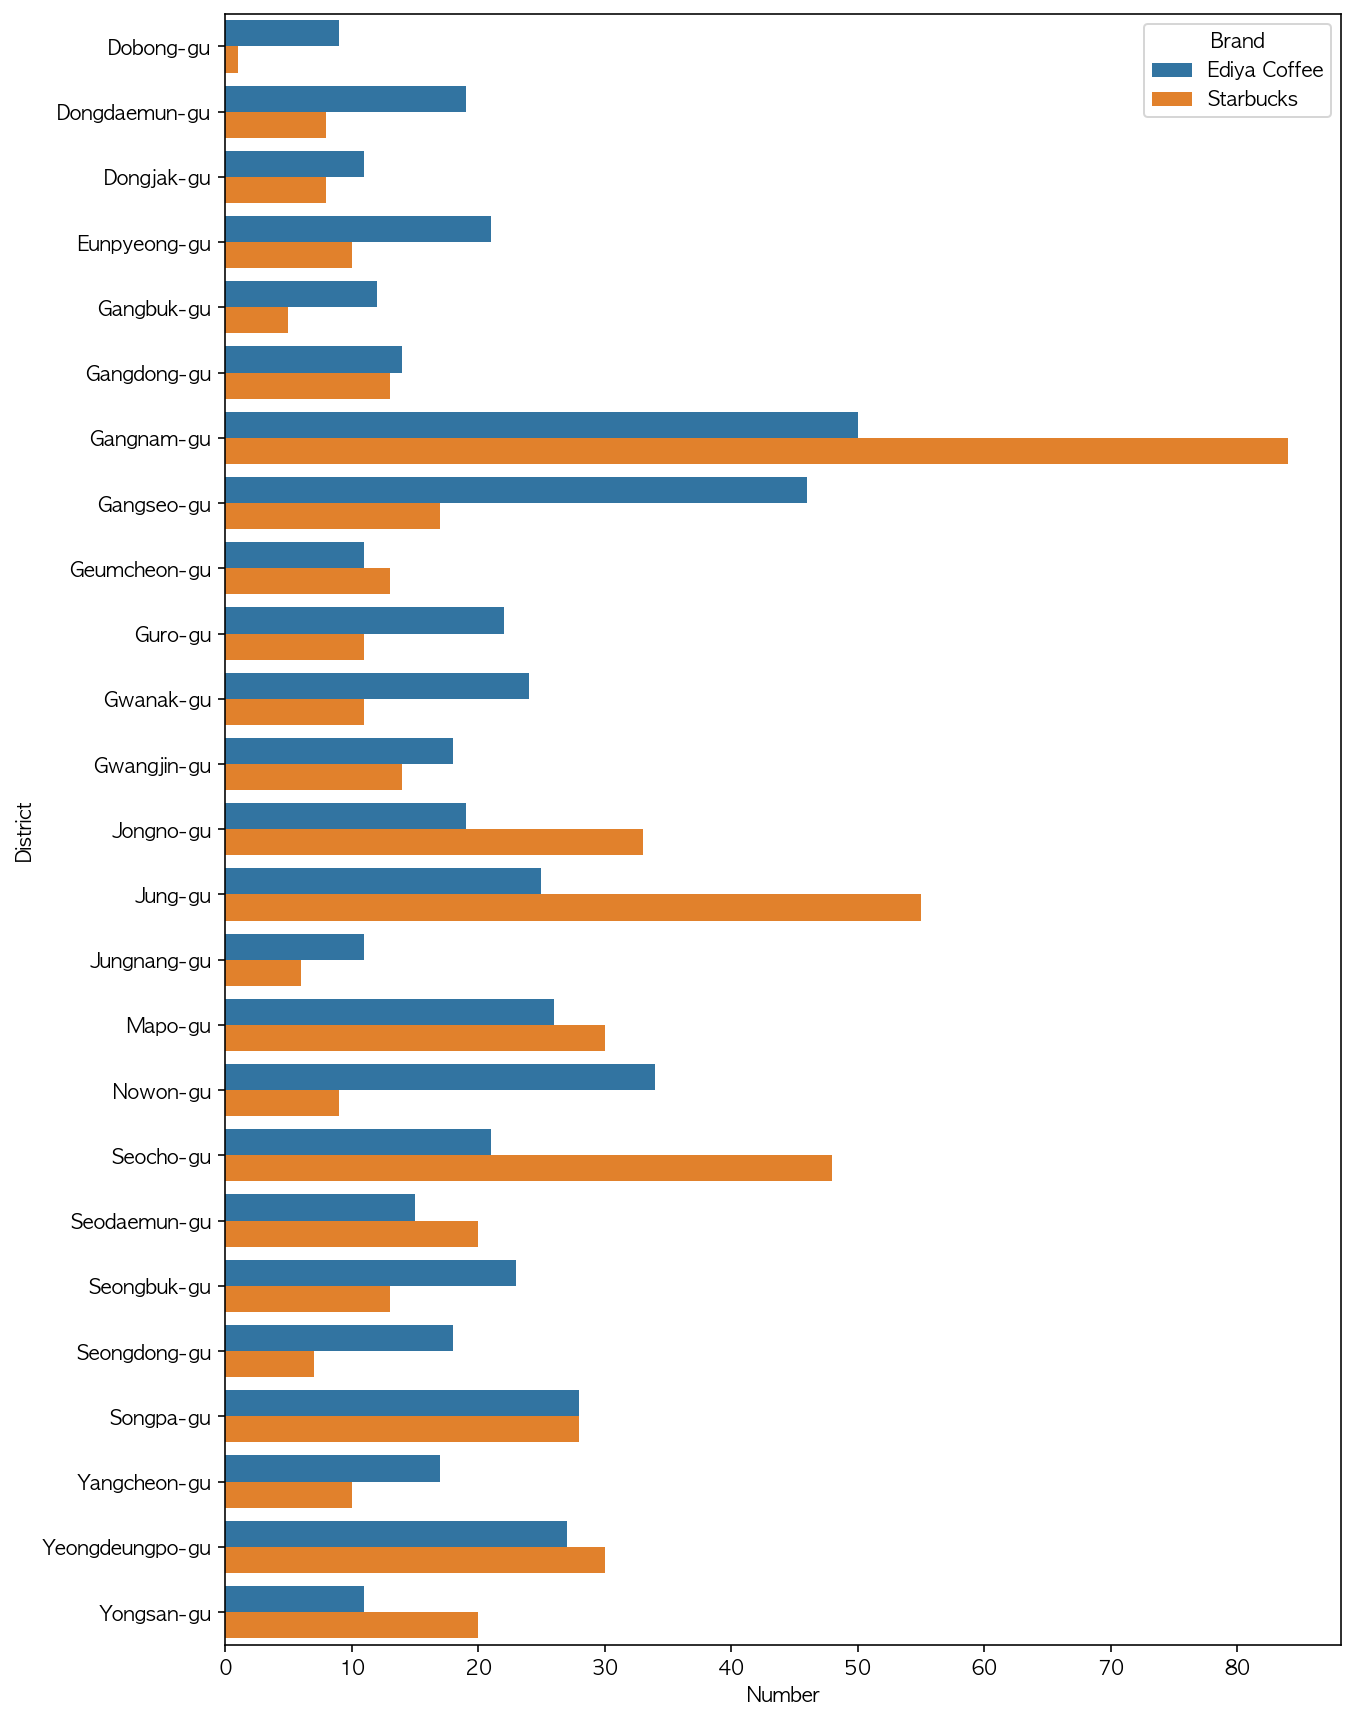

In [16]:
plt.figure(figsize=(10,15))
sb.barplot(data=df_cafe_count, y="District", x="Number", hue="Brand")

<AxesSubplot:ylabel='District'>

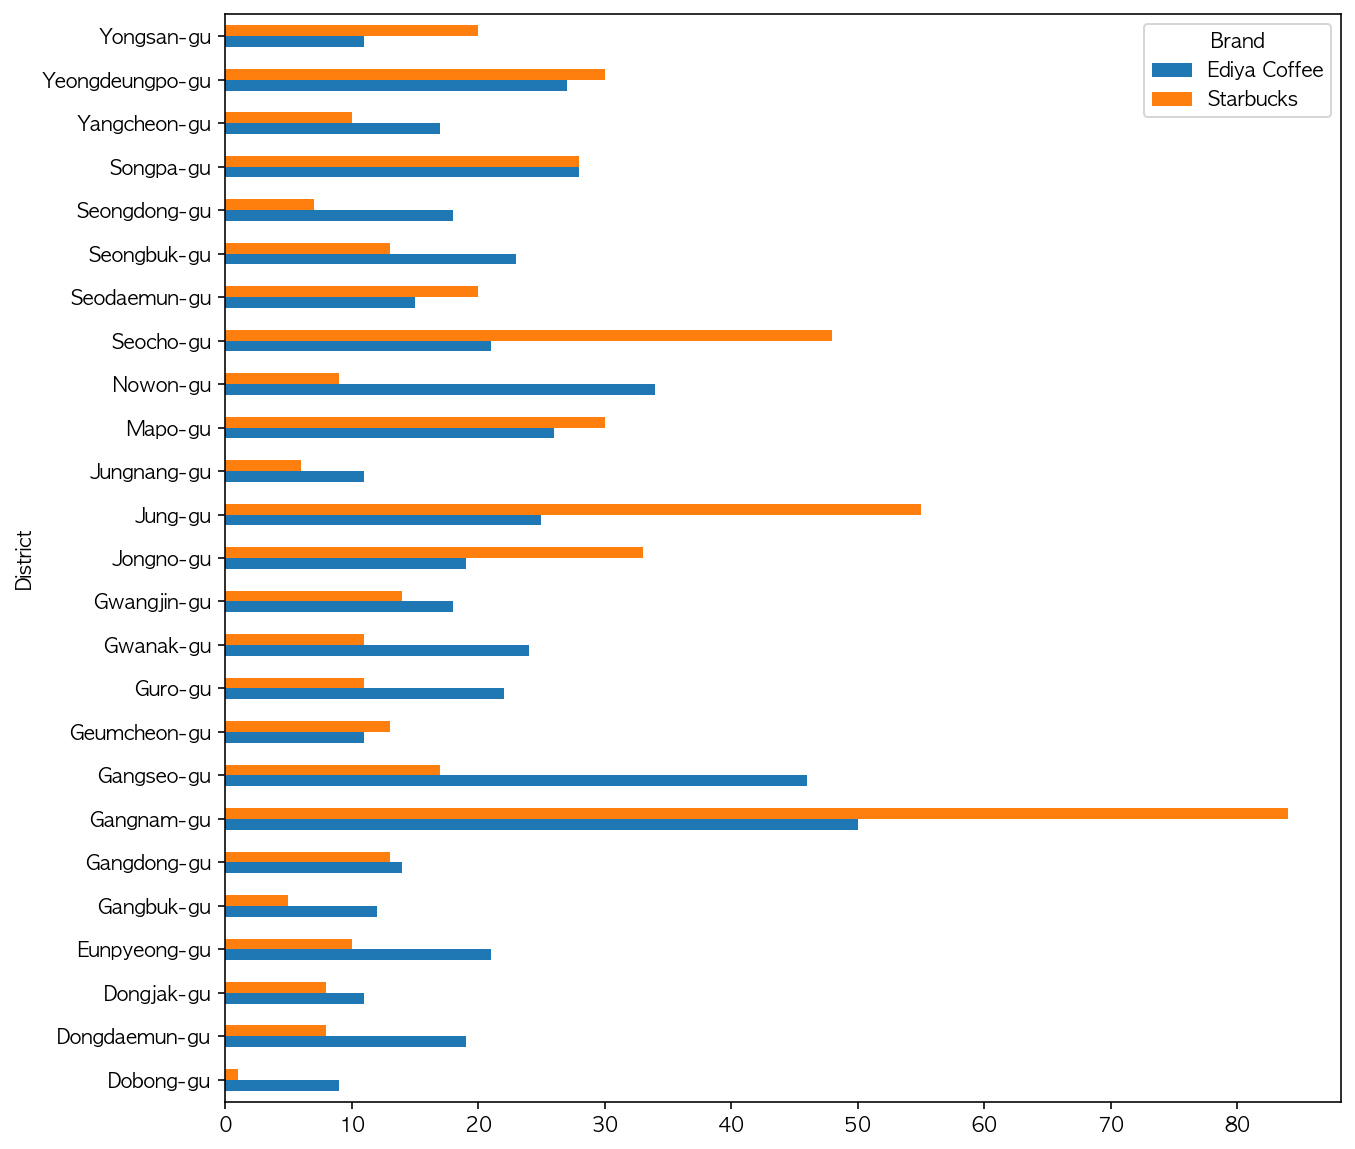

In [17]:
df_caffe_vc = df_cafe.groupby(["District", "Brand"])["Store Name"].count()
df_caffe_vc.unstack().plot.barh(figsize=(10,10))

<AxesSubplot:ylabel='District'>

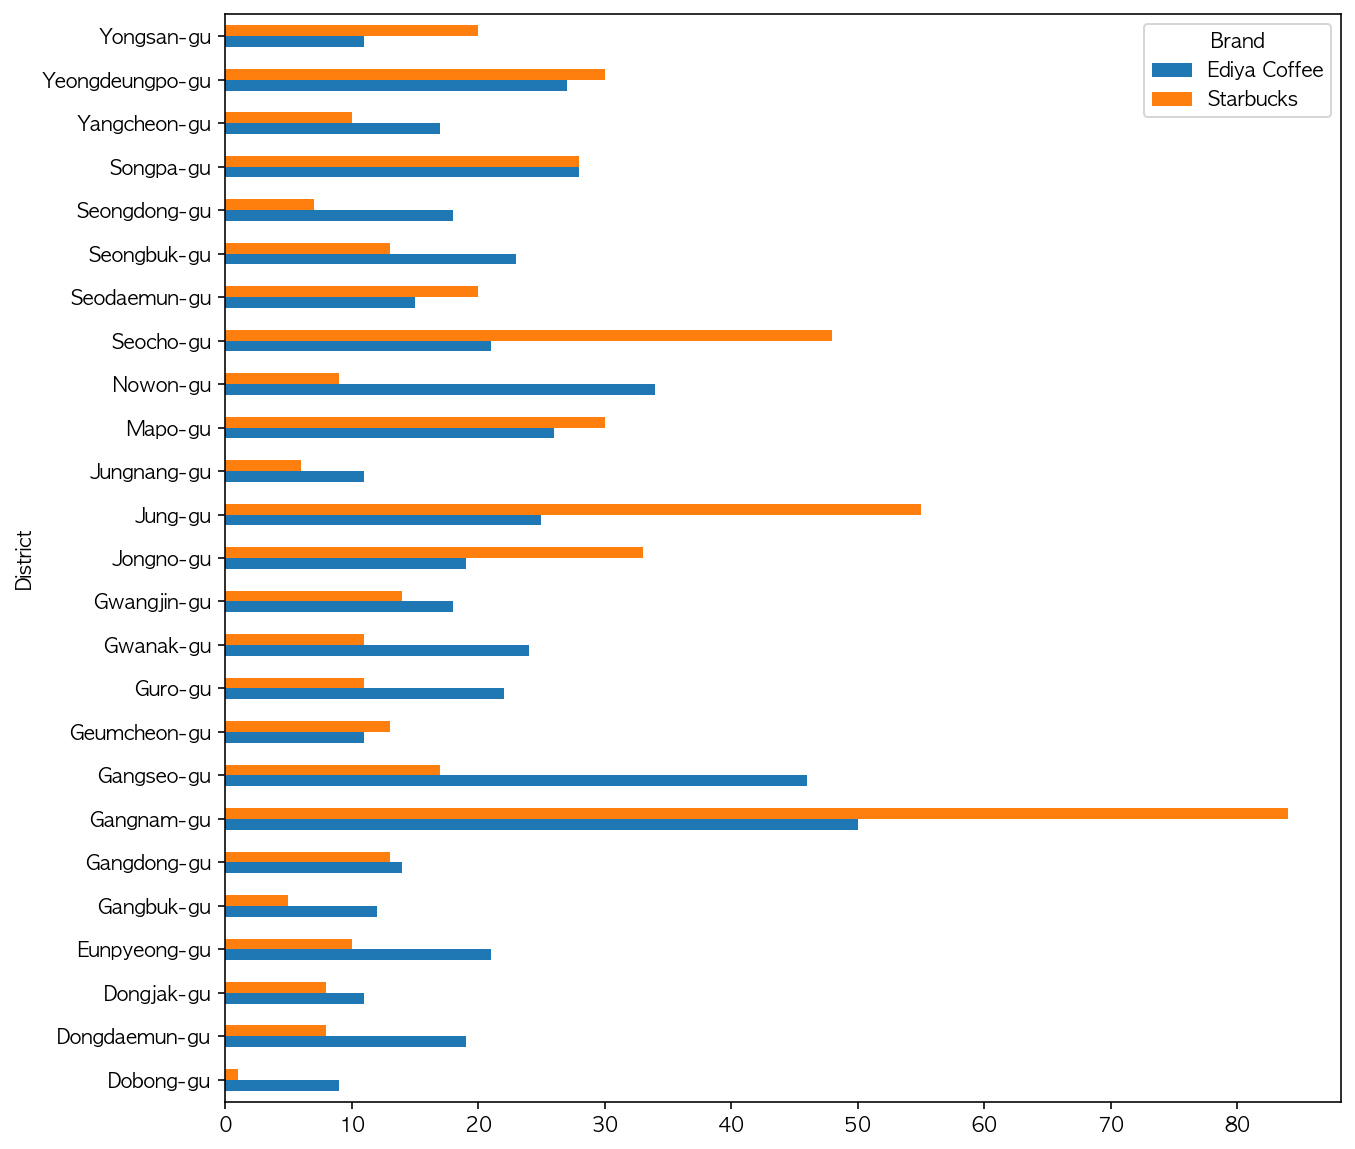

In [18]:
pd.pivot_table(data=df_cafe, index="District", 
               columns="Brand", values="Store Name", aggfunc="count").plot.barh(figsize=(10,10))

## Map Visualization

### Folium with SimpleMarker

In [19]:
import folium

lat = df_cafe["Latitude"].mean()
long = df_cafe["Longitude"].mean()
m = folium.Map([lat,long])

for i in df_cafe.index[:100]:
    sub_lat = df_cafe.loc[i, "Latitude"]
    sub_long = df_cafe.loc[i, "Longitude"]
    title = df_cafe.loc[i, "Store Name"]
    
    color = "green"
    if (df_cafe.loc[i, "Brand"] == "Ediya Coffee"):
        color = "blue"
    
    folium.Marker([sub_lat,sub_long], icon=folium.Icon(color=color), tooltip=title).add_to(m)

m

### GeoJSON and Choropleth

In [20]:
# southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.
geo_path = "seoul_municipalities_geo_simple.json"

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json["features"][0]["properties"]["name_eng"]

'Gangdong-gu'

#### Chorolopleth: Starbucks 

In [21]:
df_starbucks = df_cafe_count[df_cafe_count["Brand"] == "Starbucks"].copy()
df_starbucks.head()

,District,Brand,Number
1,Dobong-gu,Starbucks,1
3,Dongdaemun-gu,Starbucks,8
5,Dongjak-gu,Starbucks,8
7,Eunpyeong-gu,Starbucks,10
9,Gangbuk-gu,Starbucks,5


In [22]:
m = folium.Map([lat,long])
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_starbucks,
    columns=['District', 'Number'],
    key_on='feature.properties.name_eng',
    fill_color='YlGn',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Starbuck Stores'
).add_to(m)

m

#### Choropleth: Ediya Coffee 

In [23]:
df_ediya = df_cafe_count[df_cafe_count["Brand"] == "Ediya Coffee"].copy()

m = folium.Map([lat,long], tiles="stamen toner")
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['District', 'Number'],
    key_on='feature.properties.name_eng',
    fill_color='Blues',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Ediya Stores'
).add_to(m)

m

### CircleMarker based on Number of Stores

In [24]:
# reshaping data frame
df_cafe_comparison = df_cafe_count.pivot(index="District", columns="Brand", values="Number")
df_cafe_comparison["Comparison"] = (df_cafe_comparison["Starbucks"] - df_cafe_comparison["Ediya Coffee"]) > 0
df_cafe_comparison = df_cafe_comparison.reset_index()
df_cafe_comparison.head()

Brand,District,Ediya Coffee,Starbucks,Comparison
0,Dobong-gu,9,1,False
1,Dongdaemun-gu,19,8,False
2,Dongjak-gu,11,8,False
3,Eunpyeong-gu,21,10,False
4,Gangbuk-gu,12,5,False


In [25]:
# float => for radius of circle marker
df_cafe_comparison["Comparison"] = df_cafe_comparison["Comparison"].astype(float)
df_cafe_comparison.reset_index().head()

Brand,index,District,Ediya Coffee,Starbucks,Comparison
0,0,Dobong-gu,9,1,0.0
1,1,Dongdaemun-gu,19,8,0.0
2,2,Dongjak-gu,11,8,0.0
3,3,Eunpyeong-gu,21,10,0.0
4,4,Gangbuk-gu,12,5,0.0


In [26]:
df_district_mean = df_cafe.pivot_table(index="District", values=["Longitude", "Latitude"], aggfunc="mean")
df_district_mean = df_district_mean.reset_index()
df_district_mean.head()

,District,Latitude,Longitude
0,Dobong-gu,37.665765,127.040474
1,Dongdaemun-gu,37.580701,127.054928
2,Dongjak-gu,37.495700,126.948902
3,Eunpyeong-gu,37.614068,126.920417
4,Gangbuk-gu,37.631146,127.022897


In [27]:
df_cafe_comparison = df_cafe_comparison.merge(df_district_mean, how='inner', left_on="District", right_on="District")
df_cafe_comparison.head()

,District,Ediya Coffee,Starbucks,Comparison,Latitude,Longitude
0,Dobong-gu,9,1,0.0,37.665765,127.040474
1,Dongdaemun-gu,19,8,0.0,37.580701,127.054928
2,Dongjak-gu,11,8,0.0,37.495700,126.948902
3,Eunpyeong-gu,21,10,0.0,37.614068,126.920417
4,Gangbuk-gu,12,5,0.0,37.631146,127.022897


In [28]:
m = folium.Map([lat,long], zoom_start=12, tiles="stamen toner")

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_cafe_comparison,
    columns=['District', 'Comparison'],
    key_on='feature.properties.name_eng',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.4,
    legend_name='Brnad Store Comparison'
).add_to(m)

for i in df_cafe_comparison.index:
    sub_long = df_cafe_comparison.loc[i, "Longitude"]
    sub_lat = df_cafe_comparison.loc[i, "Latitude"]
    
    cafes = ["Starbucks", "Ediya Coffee"]
    for cafe in cafes:
        cafe_count = df_cafe_comparison.loc[i, cafe]       
        district = df_cafe_comparison.loc[i, "District"]
        tooltip = f"{district} {cafe} : {cafe_count}"      
        radius = np.sqrt(cafe_count) * 3
             
        if cafe == "Ediya Coffee":
            color = "blue"
            sub_long = sub_long + 0.01
        else:
            color = "green"
            
        folium.CircleMarker([sub_lat, sub_long],
                            radius=radius,
                            color=color,
                            fill=True,
                            tooltip=tooltip
                           ).add_to(m)
        

m